# Average Filter

This code is based on the MATLAB examples demonstrated in 'Kalman filter for beginners with MATLAB Examples'.

The Average Filter is a good function for leveling out the variances within a continuous stream of noisy data. The following code will demonstrate how to average-in data beig added sequentially to the system.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

## The AverageFilter Class

The AverageFilter class is the heart of our task and performs two important functions:
* Retain the number of data points and average value from previous calculations
* Perform the averaging calculations using a recursive averaging formula

### Recursive Averaging

The Recursive Averaging Formula simply allows us to avarage-in a new value after a previous avarage has been calculated. 

The form of this calculation is:

$$
\overline{x}_k = \frac{k-1}{k}\overline{x}_{k-1}+\frac{1}{k}x_k
$$

A simplification can go as follows:

$$
\alpha \equiv \frac{k-1}{k}=1-\frac{1}{k}
$$

$$
\therefore \frac{1}{k}=1-\alpha
$$

With a final simplified formula as:

$$
\overline{x}_k = \alpha \overline{x}_{k-1}+(1-\alpha)x_k
$$

In using recursive averaging, the algorithm has no need to store  previous values in order to generate a new average when a new data point comes along - saving time and system resources.

In [2]:
class AverageFilter():
    def __init__(self):
        self.prevAvg=0 # variables to hold onto the calculated average and count of data points
        self.k=1.0
    '''
    # __call__ is a built-in function and makes AverageFilter equivalent to a function object in C++,
    where AverageFilter will behave like a function. Good reference -https://www.geeksforgeeks.org/__call__-in-python/
    '''
    def __call__(self, x):  
        # Recursive averaging formula
        alpha = (self.k - 1)/self.k
        avg = alpha * self.prevAvg + (1 - alpha) * x;
        self.k = self.k + 1;
        
        self.prevAvg = avg
        
        return avg # return the new average

## Testing the AverageFilter Class

### Voltage Readings

As in the book, I will use the example of a voltage signal. The scenario being that a technician is taking voltage readings from a battery and observing varying results of the measurement. The technician decides to collect the readings and pass them through an AverageFilter.

In [4]:
def getVoltage():
    w = 4 * random.uniform(-1, 1); #Generate the noise variable
    v = 14.4 + w; # add it to a constant voltage
    
    return v # return the noisy voltage reading

### The Test Code

The following code will gather a voltage reading in series, pass it to the AverageFilter class, then plot the results vs the time interval of the measurements.

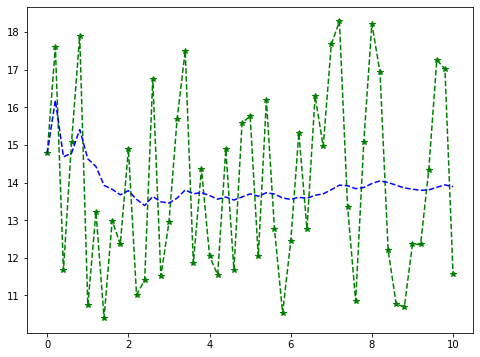

In [5]:
# Set the time step and generate the time intervals between 0 and 10
dt=0.2 
t=np.arange(0.0, 10.0 + dt, dt)

nSamples = t.size

# Create arrays for both the average and raw voltage data. Initialize elementa to zero
avgSaved = np.zeros((nSamples, 1), dtype=float)
xmSaved = np.zeros((nSamples, 1), dtype=float)

# Instantiate the AverageFilter class
avgFilter = AverageFilter()

# Run through the time intervals and generate the raw voltage and average for each
for k in range(nSamples):
    xm = getVoltage()
    
    # This is the beauty of the recursive filter. Each data point is averages into the previous average
    avg = avgFilter(xm)
    
    avgSaved[k] = avg;
    xmSaved[k] = xm;

# Plot the values
fig = plt.figure(figsize=(8, 6))
x = t
plt.plot(x, xmSaved, 'g*--')
plt.plot(x, avgSaved,'b--');
